In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve

%matplotlib inline

import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

In [2]:
def recalculate_fpr_tpr(fpr, tpr, totalT, totalF, percent):
    hT = totalF * percent/100 #hidden true
    
    T_re = totalT + hT
    F_re = totalF - hT
    
    hTp = tpr * hT
    Fp = fpr * totalF
    Fp_re = Fp - hTp
    fpr_re = Fp_re / F_re
        
    args = np.argsort(fpr_re)
    fpr_re_s = fpr_re[args]
    tpr_re_s = tpr[args]
    mask = (fpr_re_s>=0)
    
    return fpr_re_s[mask], tpr_re_s[mask]
    

In [3]:
def getTestPred(Y_true, Y_pred):
    N = len(Y_true)
    y_test = np.array(Y_true).flatten()

    y_score_2x = np.array(Y_pred)
    y_score = ((y_score_2x[:N,:] + y_score_2x[N:,:]) / 2).flatten()

    totalT = np.sum(y_test)
    totalF = y_test.shape[0] - totalT
    
    return y_test, y_score, totalT, totalF



In [4]:
def getFprTprAuc(y_test, y_score, totalT, totalF):
    
    fpr, tpr, roc_auc = [0]*5, [0]*5, [0]*5

    fpr[0], tpr[0], _ = roc_curve(y_test, y_score)
    roc_auc[0] = auc(fpr[0], tpr[0])

    for x in range(1,5):
        fpr[x], tpr[x] = recalculate_fpr_tpr(fpr[0], tpr[0], totalT, totalF, x*10 )
        roc_auc[x] = auc(fpr[x], tpr[x])
        
    return fpr, tpr, roc_auc

In [5]:
def drawAUC(fpr, tpr, roc_auc):
    plt.figure()
    lw = 2
    #cmap_a = ['grey','b','g','orange','r']
    cmap_a = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal']

    plt.axis('square')
    for x in range(len(fpr)):
        plt.plot(fpr[x], tpr[x], c=cmap_a[x],
             lw=lw, label='%d%% (AUC = %0.2f)' % (x*10, roc_auc[x]))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [6]:
def drawPicFromData(Y_TRUE, NP_PRED):
    y_test, y_score, totalT, totalF = getTestPred(Y_TRUE, NP_PRED)
    print('T=', totalT, 'F=', totalF)
    fpr, tpr, roc_auc = getFprTprAuc(y_test, y_score, totalT, totalF)
    drawAUC(fpr, tpr, roc_auc)

In [7]:
def prec_recall(Y_TRUE, NP_PRED):
    y_test, y_score, totalT, totalF = getTestPred(Y_TRUE, NP_PRED)
    precision, recall, thresholds = precision_recall_curve( y_test, y_score)
    
    F1 = 2*(recall * precision) / (recall + precision)
    F2 = 5*(recall * precision) / (recall + 4*precision)

    plt.figure()
    lw = 2
    #cmap_a = ['grey','b','g','orange','r']
    cmap_a = ['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal']

    plt.axis('square')
    plt.plot(thresholds, precision[:-1], c=cmap_a[0], lw=lw, label='precision')
    plt.plot(thresholds, recall[:-1],    c=cmap_a[1], lw=lw, label='recall')
    plt.plot(thresholds, F1[:-1],        c=cmap_a[2], lw=lw, label='F1')
    plt.plot(thresholds, F2[:-1],        c=cmap_a[3], lw=lw, label='F2')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Threshold')
    plt.ylabel('')
    plt.title('Prec/Recall')
    plt.legend(loc="lower right")
    plt.show()

In [8]:
NP_Nucl = pd.read_csv('OUTPUT/pred_score_nucl.tsv', sep='\t', header=None)
NP_Methyl = pd.read_csv('OUTPUT/pred_score_methyl.tsv', sep='\t', header=None)

Y_Nucl = pd.read_csv('OUTPUT/peak_nucl.tsv', sep='\t', header=None)
Y_Methyl = pd.read_csv('OUTPUT/peak_methyl.tsv', sep='\t', header=None)

In [9]:
NP_Nucl_c = pd.read_csv('OUTPUT/pred_c0_score_nucl.tsv', sep='\t', header=None)
NP_Methyl_c = pd.read_csv('OUTPUT/pred_c1_score_met.tsv', sep='\t', header=None)

Y_Nucl_c = pd.read_csv('OUTPUT/peak_c0_nucl.tsv', sep='\t', header=None)
Y_Methyl_c = pd.read_csv('OUTPUT/peak_c1_met.tsv', sep='\t', header=None)

In [107]:
Y_Nucl.shape

(441485, 102)

T= 13743088.0 F= 31288382.0


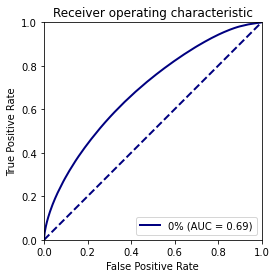

In [19]:
y_test, y_score, totalT, totalF = getTestPred(Y_Nucl, NP_Nucl)
print('T=', totalT, 'F=', totalF)
fpr, tpr, roc_auc = getFprTprAuc(y_test, y_score, totalT, totalF)
drawAUC(fpr[:1], tpr[:1], roc_auc[:1])

Tc= 13743088.0 Fc= 31288382.0


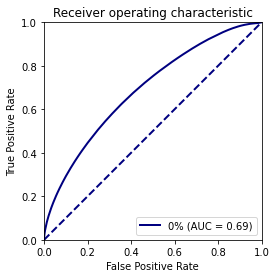

In [20]:
y_test_c, y_score_c, totalT_c, totalF_c = getTestPred(Y_Nucl_c, NP_Nucl_c)
print('Tc=', totalT_c, 'Fc=', totalF_c)
fpr_c, tpr_c, roc_auc_c = getFprTprAuc(y_test_c, y_score_c, totalT_c, totalF_c)
drawAUC(fpr_c[:1], tpr_c[:1], roc_auc_c[:1])

T= 9496084.0 F= 35535386.0


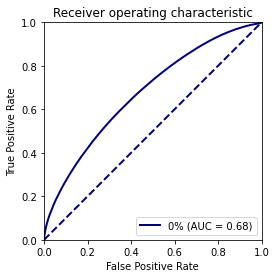

In [11]:
y_test, y_score, totalT, totalF = getTestPred(Y_Methyl, NP_Methyl)
print('T=', totalT, 'F=', totalF)
fpr, tpr, roc_auc = getFprTprAuc(y_test, y_score, totalT, totalF)
drawAUC(fpr[:1], tpr[:1], roc_auc[:1])

T= 9496084.0 F= 35535386.0


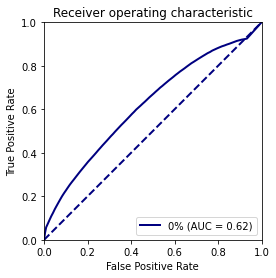

In [17]:
y_test, y_score, totalT, totalF = getTestPred(Y_Methyl_c, NP_Methyl_c)
print('T=', totalT, 'F=', totalF)
fpr, tpr, roc_auc = getFprTprAuc(y_test, y_score, totalT, totalF)
drawAUC(fpr[:1], tpr[:1], roc_auc[:1])

T= 13743088.0 F= 31288382.0


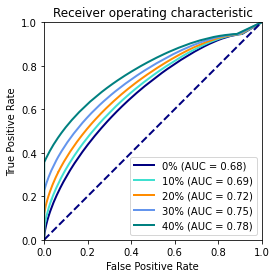

In [108]:
drawPicFromData(Y_Nucl, NP_Nucl)

T= 9496084.0 F= 35535386.0


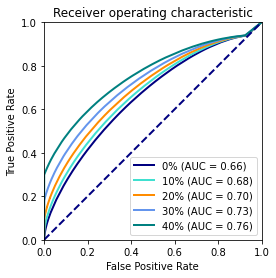

In [109]:
drawPicFromData(Y_Methyl, NP_Methyl)

T= 13743088.0 F= 31288382.0


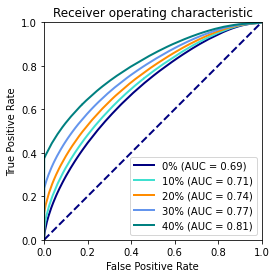

In [21]:
drawPicFromData(Y_Nucl_c, NP_Nucl_c)

T= 9496084.0 F= 35535386.0


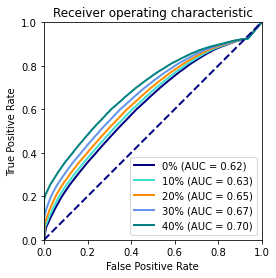

In [22]:
drawPicFromData(Y_Methyl_c, NP_Methyl_c)

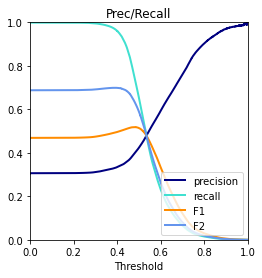

In [23]:
prec_recall(Y_Nucl, NP_Nucl)

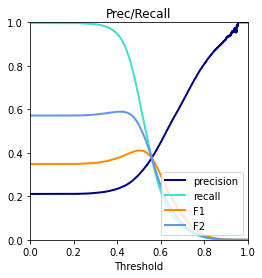

In [24]:
prec_recall(Y_Methyl, NP_Methyl)

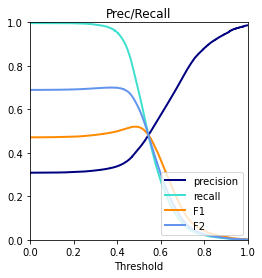

In [25]:
prec_recall(Y_Nucl_c, NP_Nucl_c)

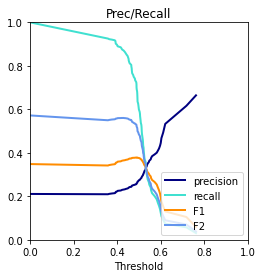

In [26]:
prec_recall(Y_Methyl_c, NP_Methyl_c)

In [112]:
NP_Nucl_10pct = pd.read_csv('OUTPUT/pred_score_nucl_10pct.tsv', sep='\t', header=None)
NP_Methyl_10pct = pd.read_csv('OUTPUT/pred_score_methyl_10pct.tsv', sep='\t', header=None)

Y_Nucl_10pct = pd.read_csv('OUTPUT/peak_nucl_10pct.tsv', sep='\t', header=None)
Y_Methyl_10pct = pd.read_csv('OUTPUT/peak_methyl_10pct.tsv', sep='\t', header=None)

T= 12368109.0 F= 32663361.0


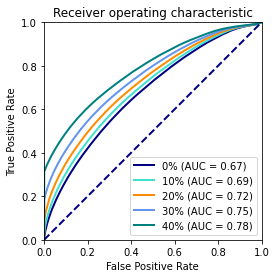

In [113]:
drawPicFromData(Y_Nucl_10pct, NP_Nucl_10pct)

T= 8546680.0 F= 36484790.0


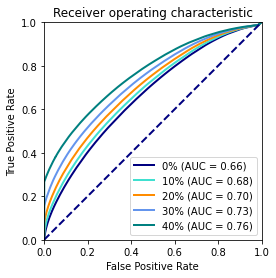

In [114]:
drawPicFromData(Y_Methyl_10pct, NP_Methyl_10pct)

T= 13743088.0 F= 31288382.0


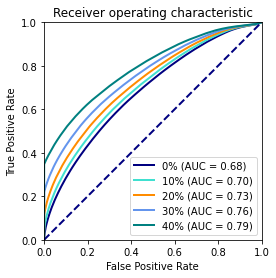

In [115]:
drawPicFromData(Y_Nucl, NP_Nucl_10pct)

T= 9496084.0 F= 35535386.0


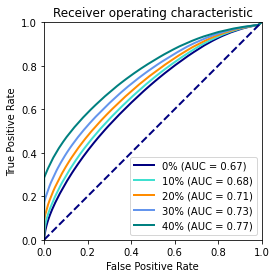

In [116]:
drawPicFromData(Y_Methyl, NP_Methyl_10pct)

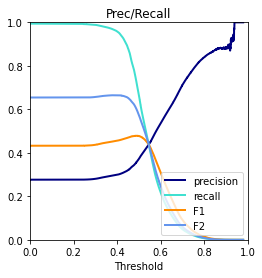

In [117]:
prec_recall(Y_Nucl_10pct, NP_Nucl_10pct)

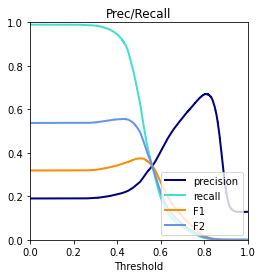

In [118]:
prec_recall(Y_Methyl_10pct, NP_Methyl_10pct)

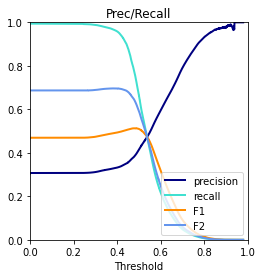

In [119]:
prec_recall(Y_Nucl, NP_Nucl_10pct)

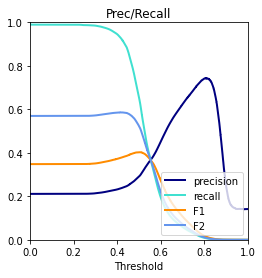

In [120]:
prec_recall(Y_Methyl, NP_Methyl_10pct)

In [15]:
NP_Nucl_20pct = pd.read_csv('OUTPUT/pred_score_nucl_20pct.tsv', sep='\t', header=None)
NP_Methyl_20pct = pd.read_csv('OUTPUT/pred_score_methyl_20pct.tsv', sep='\t', header=None)

Y_Nucl_20pct = pd.read_csv('OUTPUT/peak_nucl_20pct.tsv', sep='\t', header=None)
Y_Methyl_20pct = pd.read_csv('OUTPUT/peak_methyl_20pct.tsv', sep='\t', header=None)

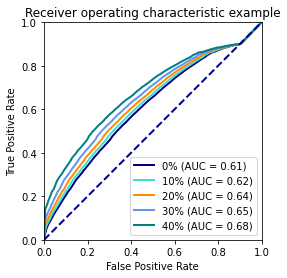

In [16]:
drawPicFromData(Y_Nucl_20pct, NP_Nucl_20pct)

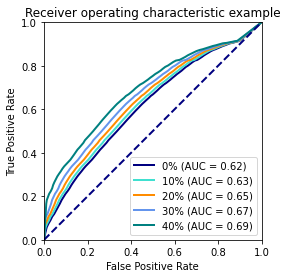

In [17]:
drawPicFromData(Y_Methyl_20pct, NP_Methyl_20pct)

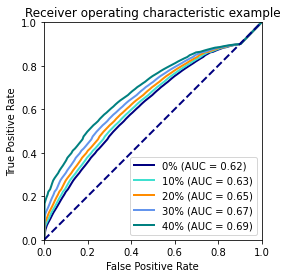

In [47]:
drawPicFromData(Y_Nucl, NP_Nucl_20pct)

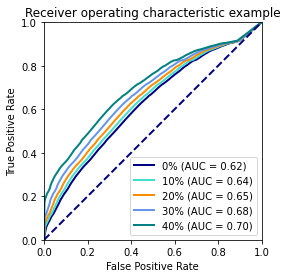

In [46]:
drawPicFromData(Y_Methyl, NP_Methyl_20pct)

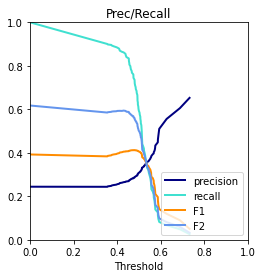

In [63]:
prec_recall(Y_Nucl_20pct, NP_Nucl_20pct)

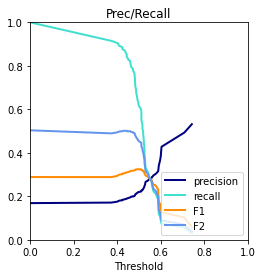

In [64]:
prec_recall(Y_Methyl_20pct, NP_Methyl_20pct)

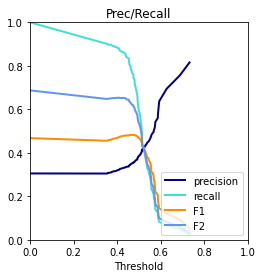

In [65]:
prec_recall(Y_Nucl, NP_Nucl_20pct)

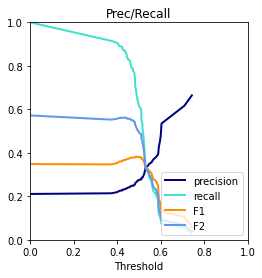

In [66]:
prec_recall(Y_Methyl, NP_Methyl_20pct)

In [28]:
import pgzip as gz
import _pickle as pkl

import seaborn as sns

In [135]:
def draw_trainig_curve(fn):
    with gz.open(fn, 'rb') as f:
        (epoch0_loss, l_loss) = pkl.load(f)

    L = len(epoch0_loss)
    np_L = np.expand_dims(np.array(range(1, L+1))/(L+1), axis=1)
    np_epoch = np.array(epoch0_loss)
    np_mean = np_epoch.mean(axis=1, keepdims=True)
    np_epoch0 = np.concatenate([np_L, np_epoch, np_mean], axis=1)

    L = len(l_loss)
    np_L = np.expand_dims(np.array(range(1, L+1)), axis=1)
    np_epoch = np.array(l_loss)
    np_mean = np_epoch.mean(axis=1, keepdims=True)
    np_epoch1 = np.concatenate([np_L, np_epoch, np_mean], axis=1)

    pd_loss = pd.DataFrame( np.concatenate([np_epoch0,np_epoch1], axis=0), columns=['epoch','loss0','loss1','loss'] )

    sns.lineplot(x='epoch', y='loss', data=pd_loss,  label='loss')
    sns.lineplot(x='epoch', y='loss0', data=pd_loss, label='loss0')
    sns.lineplot(x='epoch', y='loss1', data=pd_loss, label='loss1')
    plt.xscale('log')

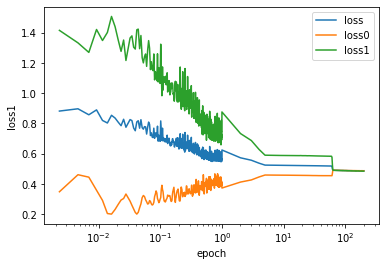

In [136]:
draw_trainig_curve('OUTPUT/loss_dup.pkl.gz')

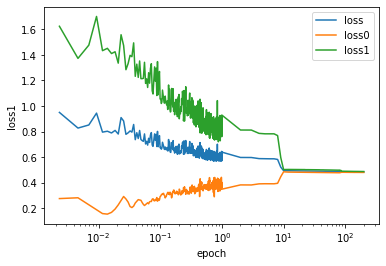

In [137]:
draw_trainig_curve('OUTPUT/loss_c0.pkl.gz')

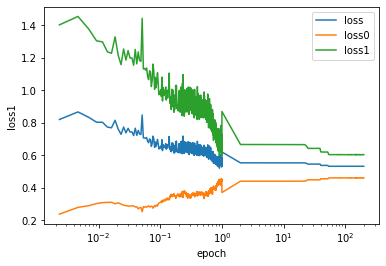

In [138]:
draw_trainig_curve('OUTPUT/loss_c1.pkl.gz')

In [116]:
def draw_trainig_curve_all(fns):
    
    for fn, lbl in fns:
        with gz.open(fn, 'rb') as f:
            (epoch0_loss, l_loss) = pkl.load(f)

        L = len(epoch0_loss)
        np_L = np.expand_dims(np.array(range(1, L+1))/(L+1), axis=1)
        np_epoch = np.array(epoch0_loss)
        np_mean = np_epoch.mean(axis=1, keepdims=True)
        np_epoch0 = np.concatenate([np_L, np_epoch, np_mean], axis=1)

        L = len(l_loss)
        np_L = np.expand_dims(np.array(range(1, L+1)), axis=1)
        np_epoch = np.array(l_loss)
        np_mean = np_epoch.mean(axis=1, keepdims=True)
        np_epoch1 = np.concatenate([np_L, np_epoch, np_mean], axis=1)

        pd_loss = pd.DataFrame( np.concatenate([np_epoch0,np_epoch1], axis=0), columns=['epoch','1','0','loss'] )

        sns.lineplot(x='epoch', y='loss', data=pd_loss, label=lbl)
    plt.xscale('log')
    plt.legend()

In [117]:
fns = [['OUTPUT/loss_dup.pkl.gz', 'N+M+T'],
       ['OUTPUT/loss_c0.pkl.gz', 'N+T'],
       ['OUTPUT/loss_c1.pkl.gz', 'M+T']]

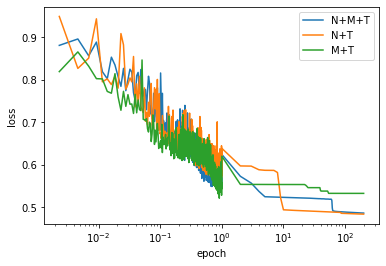

In [118]:
draw_trainig_curve_all(fns)